# Overview of Memory Types

## Memory Addresses and Hexadecimal Numbers
Next: Understand the structure of computer memory. 

Information in computers is stored as a sequence of zeros and ones, which are called bits. A bit is the smallest piece of information we can have in computing. Eight bits are grouped into a byte. Bits and Bytes are expressed in a base two number system, which is an alternative to the base 10 system. What some programmers do not know however is that in addition to the base two numbering system, there is also a base 16 system, which plays an important role in memory management. Now the idea of this section is to give you an introduction into why base two is so useful, how bits and bytes can be used to represent information, and what a base 16 system does for us. 

Early attempts to invent an electronic computing device met with disappointing results as long as engineers and computer scientists tried to use the decimal system. One of the biggest problems was the low distinctiveness of the individual symbols in the presence of [noise](https://en.wikipedia.org/wiki/Noise_%28electronics%29). A 'symbol' in our alphabet might be a letter in the range A-Z while in our decimal system it might be a number in the range 0-9. The more symbols there are, the harder it can be to differentiate between them, especially when there is electrical interference. After many years of research, an early pioneer in computing, John Atanasoff, proposed to use a coding system that expressed numbers as sequences of only two digits: one by the presence of a charge and one by the absence of a charge. This numbering system is called Base 2 or binary and it is represented by the digits 0 and 1 (called 'bit') instead of 0-9 as with the decimal system. Differentiating between only two symbols, especially at high frequencies, was much easier and more robust than with 10 digits. In a way, the ones and zeroes of the binary system can be compared to Morse Code, which is also a very robust way to transmit information in the presence of much interference. This was one of the primary reasons why the binary system quickly became the standard for computing.

Inside each computer, all numbers, characters, commands and every imaginable type of information are represented in binary form. Over the years, many coding schemes and techniques were invented to manipulate these 0s and 1s effectively. One of the most widely used schemes is called ASCII (American Standard Code for Information Interchange), which lists the binary code for a set of 127 characters. The idea was to represent each letter with a sequence of binary numbers so that storing texts on in computer memory and on hard (or floppy) disks would be possible.

The film enthusiasts among you might know the scene in the hit movie "The Martian" with Mat Daemon, in which an ASCII table plays an important role in the rescue from Mars.

The following figure shows an ASCII table, where each character (rightmost column) is associated with an 8-digit binary number:

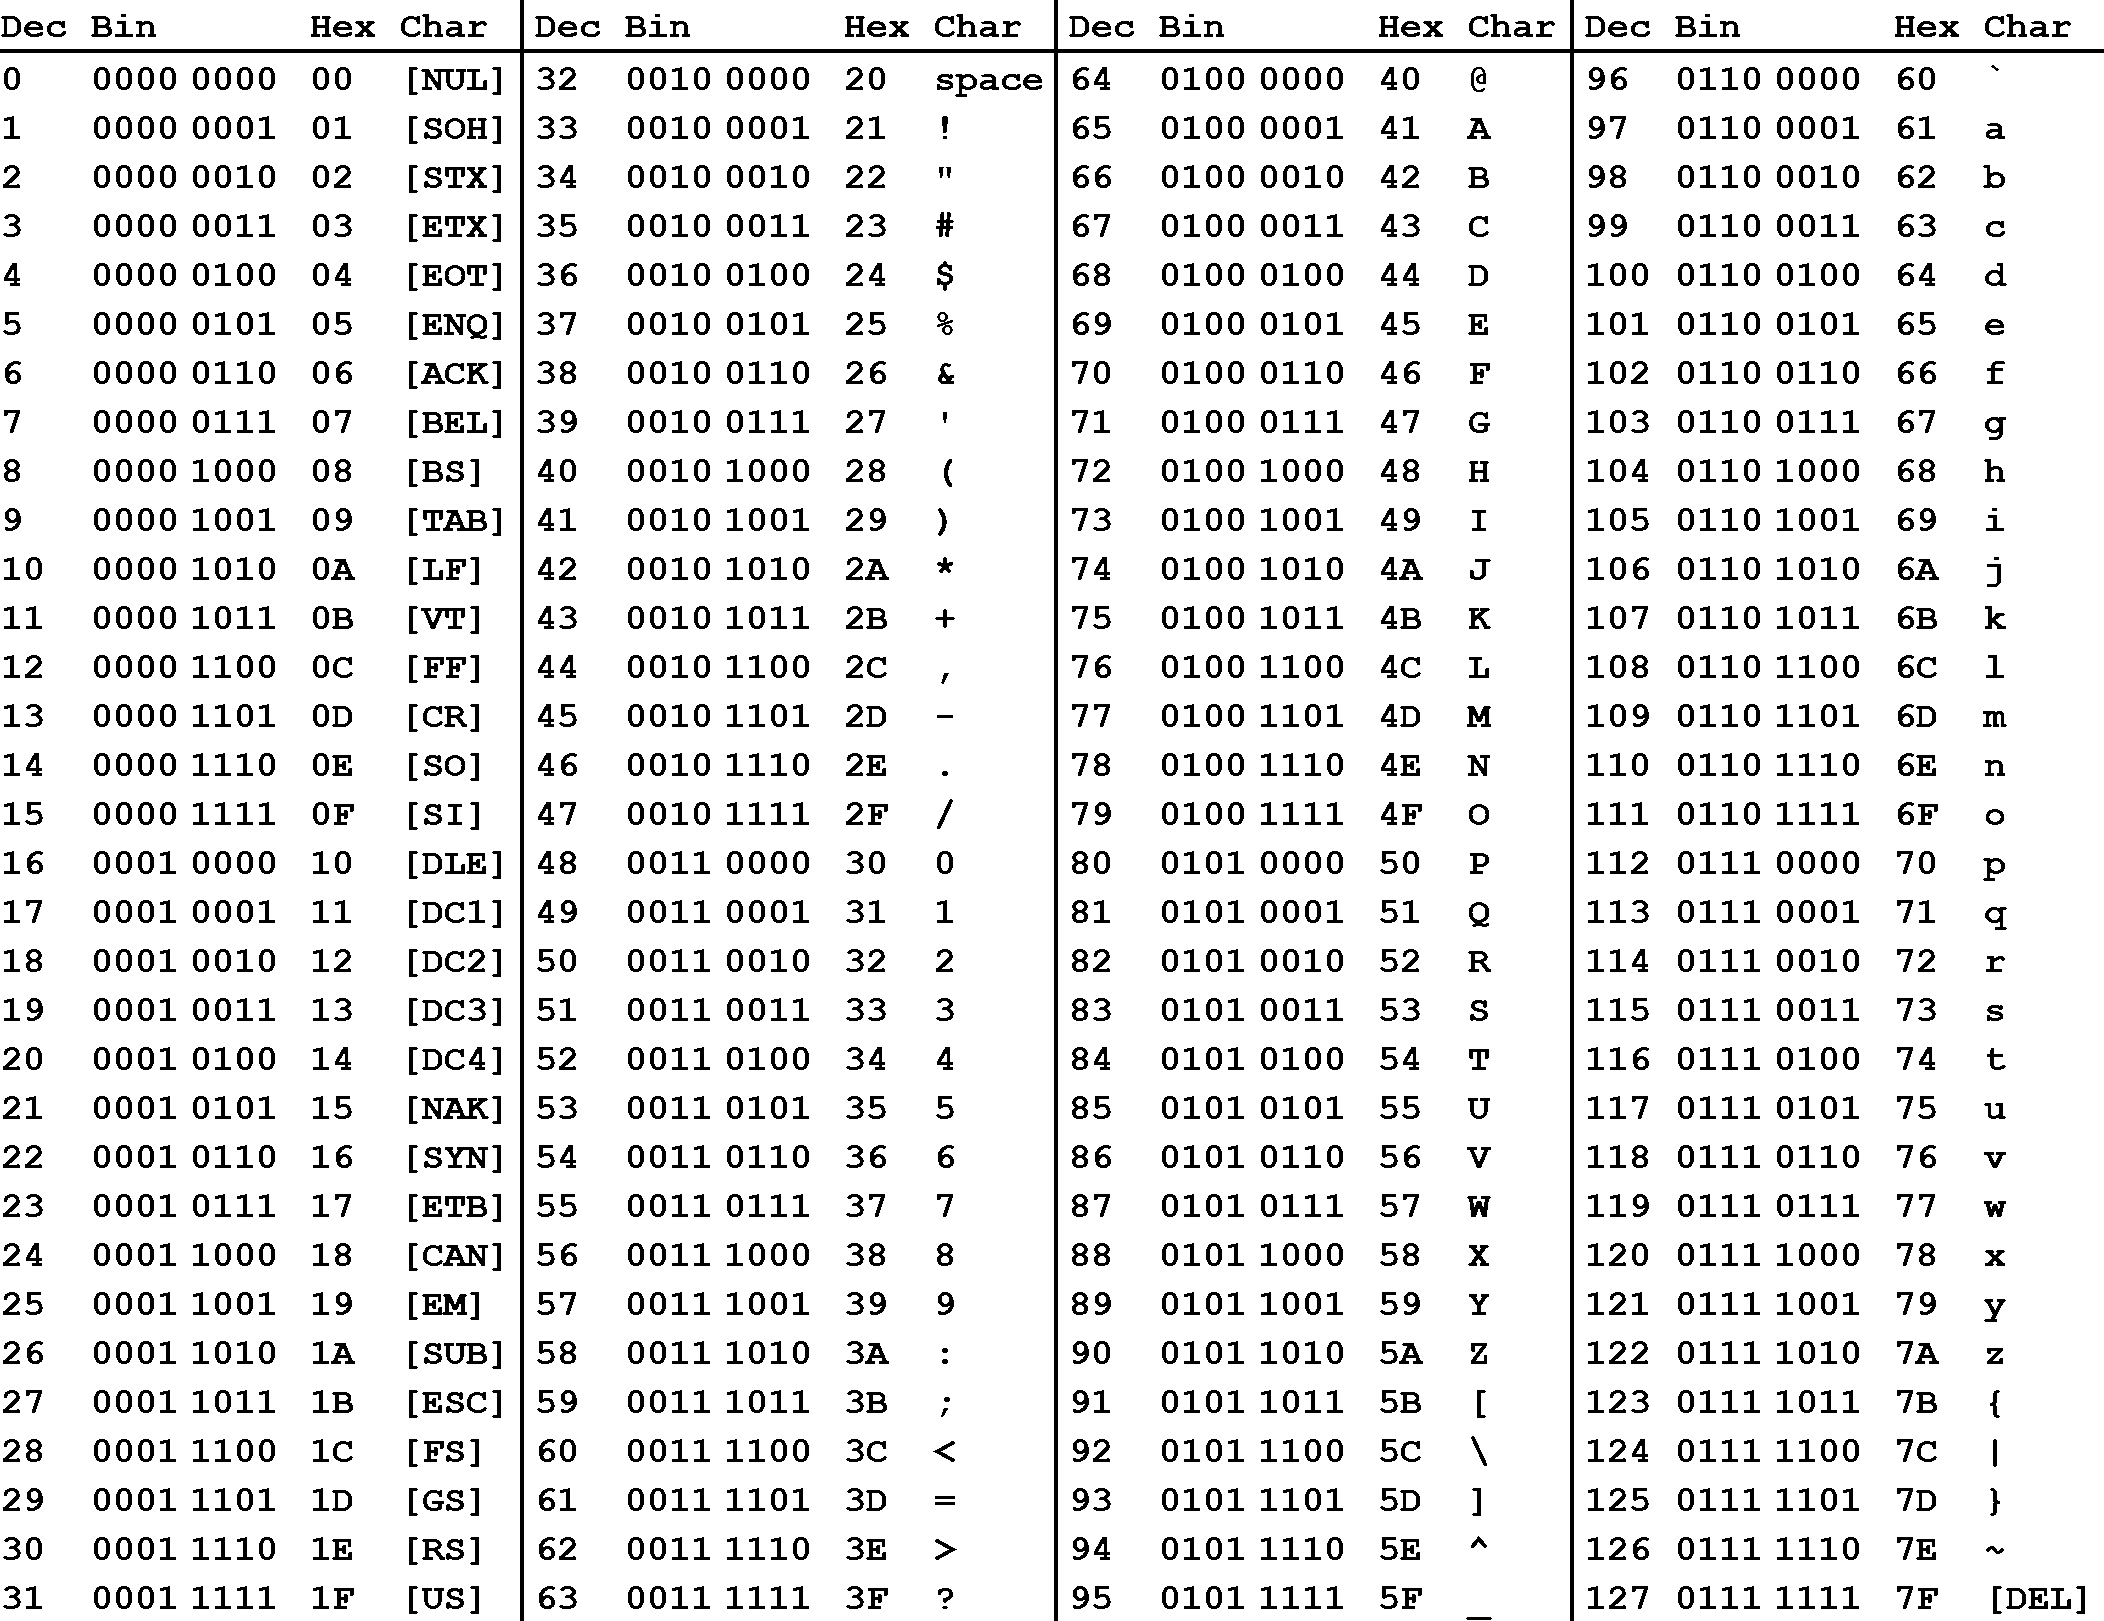

In addition to the decimal number (column "Dec") and the binary number, the ASCII table provides a third number for each character (column "Hex"). According to the table above, the letter `z` is referenced by the decimal number `122`, by the binary number `0111 1010` and by `7A`. You have probably seen this type of notation before, which is called _"hexadecimal"_. Hexadecimal (hex) numbers are used often in computer systems, e.g for displaying memory readouts - which is why we will look into this topic a little bit deeper. Instead of having a base of 2 (such as binary numbers) or a base of 10 (such as our conventional decimal numbers), hex numbers have a base of 16. The conversion between the different numbering systems is a straightforward operation and can be easily performed with any scientific calculator. More details on how to do this can e.g. be found [here](https://en.wikipedia.org/wiki/Computer_number_format).

There are several reasons why it is preferable to use hex numbers instead of binary numbers (which computers store at the lowest level), three of which are given below:

1. **Readability:** It is significantly easier for a human to understand hex numbers as they resemble the decimal numbers we are used to. It is simply not intuitive to look at binary numbers and decide how big they are and how they relate to another binary number.
2. **Information density:** A hex number with two digits can express any number from 0 to 255 (because 16^2 is 256). To do the same in the binary system, we would require 8 digits. This difference is even more pronounced as numbers get larger and thus harder to deal with.
3. **Conversion into bytes:** Bytes are units of information consisting of 8 bits. Almost all computers are byte-addressed, meaning all memory is referenced by byte, instead of by bit. Therefore, using a counting system that can easily convert into bytes is an important requirement. We will shortly see why grouping bits into a byte plays a central role in understanding how computer memory works.

The reason why early computer scientists have decided to not use decimal numbers can also be seen in the figure below. In these days (before pocket calculators were widely available), programers had to interpret computer output in their head on a regular basis. For them, it was much easier and quicker to look at and interpret `7E` instead of `0111 1110`. Ideally, they would have used the decimal system, but the conversion between base 2 and base 10 is much harder than between base 2 and base 16. Note in the figure that the decimal system's digit transitions never match those of the binary system. With the hexadecimal system, which is based on a multiple of 2, digit transitions match up each time, thus making it much easier to convert quickly between these numbering systems.

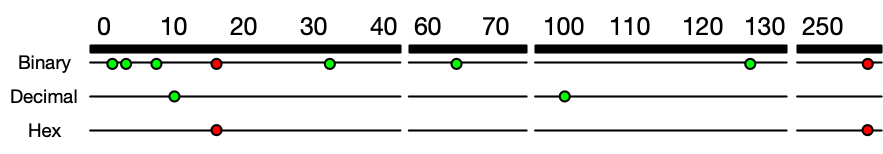

So far: Learned about bits & bytes, base-2, base-10, and base-16 numbering systems. Seen how information can be represented using a sequence of zeros and ones. This knowledge gives us the basics for understanding the structure of computer memory.

## Using the Debugger to Analyze Memory
Binary numbers and hex numbers can be used to represent information. A coding scheme such as an ASCII table makes it possible to convert text into binary form. In the following, we will try to look at computer memory and locate information there.

In the following example, we will use the debugger to look for a particular string in computer memory. Depending on your computer operating system and on the compiler you have installed, there might be several debugging tools available to you. In the following video, we will use the gdb debugger to locate the character sequence "UDACITY" in computer memory. The code below creates an array of characters in computer memory (on the stack, which we will learn more about shortly) and prints it to the console:

```cpp
#include <stdio.h>

int main()
{
    char str1[]= "UDACITY";
    printf("%s",str1);

    return 0;
}
```

### GNU debugger (gdp)
Let us try to locate the string in memory using gdb (GNU debugger). See this [cheatsheet](https://darkdust.net/files/GDB%20Cheat%20Sheet.pdf) for reference.

In the project folder, compile the program with [debugging symbols](https://en.wikipedia.org/wiki/Debug_symbol) and run gdb like this:
```bash
g++ -g -std=c++17 gdb_example.cpp -o gdb_example
gdb gdb_example
```

Once inside gdb, run this to show source code:
```bash
list
```

Set a breakpoint in line 5
```bash
break 5
```

Step to next line, print the variable, print the address of the variable
```bash
step
p str1
p &str1
```

To print the variable in memory, use the `x/nfu` command to print seven successive bytes in binary form:
* `x` to access memory
* `n` for number of units to print (here 7, one for each letter in `str1`
* `f` format. Here `t`, as an integer printed as a binary
* `u`: unit is `b`, for byte.

Print in binary form:
```bash
x/7tb &str1
```

Print in hexadecimal form:
```bash
x/7xb &str1
```

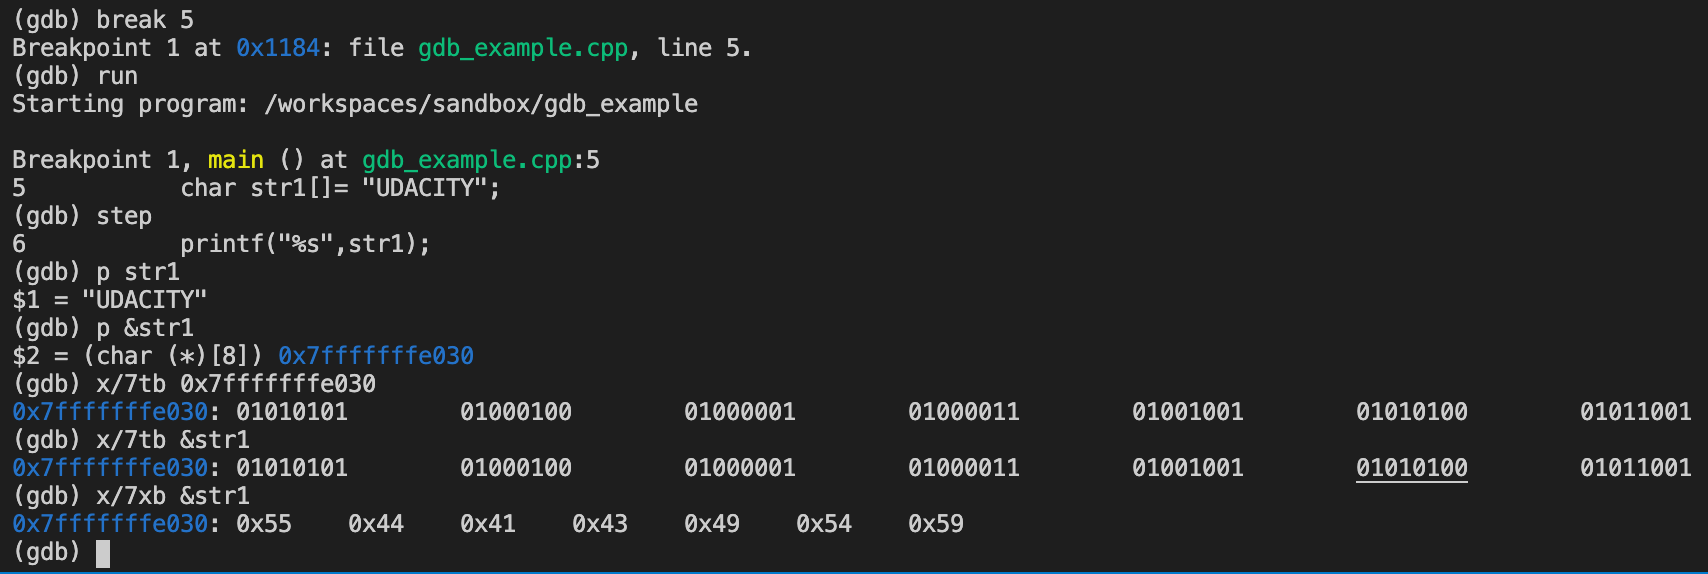

Above, the binary ASCII codes for the letters in UDACITY could be located in computer memory by using the address of the variable `str1` from the code example above. 

You can clearly see that using hex numbers to display the information is a much shorter and more convenient form for a human programmer than looking at the binary numbers. 

## Types of Computer Memory
Memory types:
* Random access memory (RAM)
* Read-only memory (ROM)
* Cache memory (e.g. level 1 (L1), level 2 (L2), level 3 (L3))
* Ultra-fast memory registers close to the CPU
* Ultra-slow hard disks with high storage capacities in the area of one terabyte
* Virtual Memory
* USB Drives

When the CPU of a computer needs to access memory, it wants to do this with minimal latency. Preferably, we'd like to be able to store large amounts of data. 

Low latency and large memory are not compatible with each other (at least not at a reasonable price). Thus, there are multiple types of memory available in a computer that are arranged hierarchically:

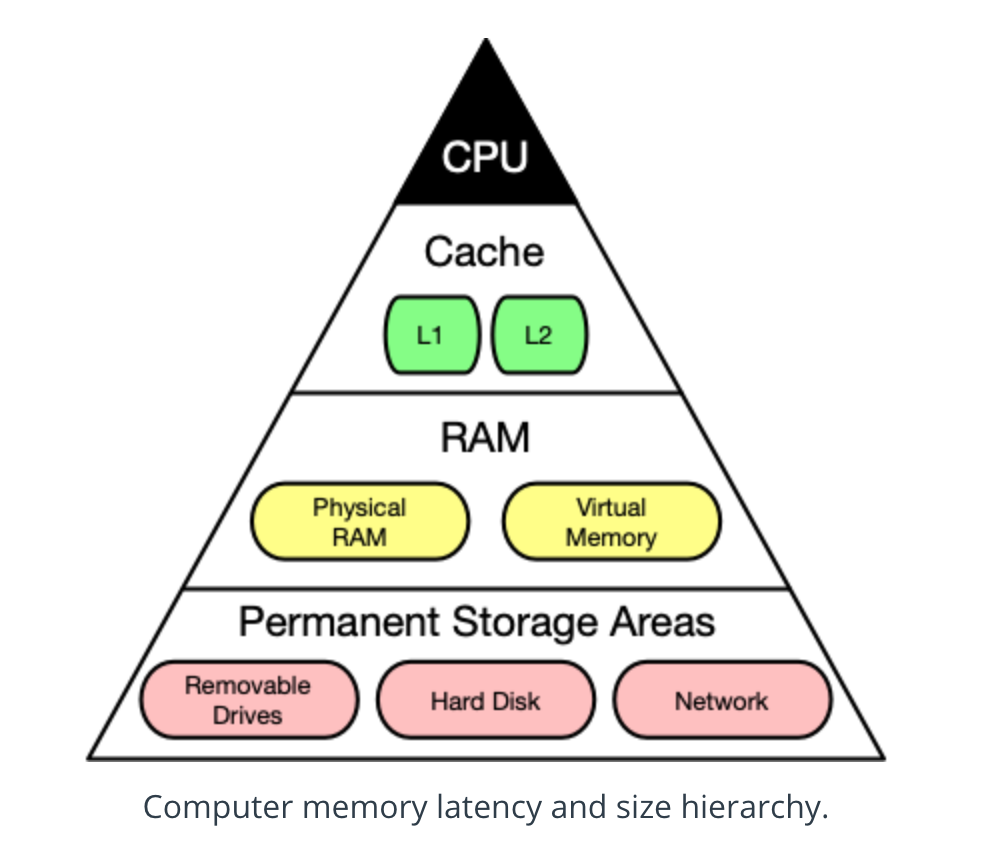

* The CPU and its ultra-fast (but small) registers used for short-term data storage reside at the top of the pyramid.
* Below are Cache and RAM, which belong to the category of temporary memory which quickly looses its content once power is cut off. 
* Finally, there are permanent storage devices such as the ROM, hard drives, as well as removable devices such as USB sticks.

Scenarios:
1. After switching on the computer, data is loaded from its **read-only memory (ROM)** and performs a **power-on self-test (POST)** to ensure that all major components are working properly. Additionally, the computer memory controller checks all of the memory addresses with a simple read/write operation to ensure that memory is functioning correctly.
2. After performing the self-test, the computer loads the **basic input/output system (BIOS)** from ROM. The major task of the BIOS is to make the computer functional by providing basic information about such things as storage devices, boot sequence, security or auto device recognition capability. 
3. The process of activating a more complex system on a simple system is called **"bootstrapping"**: It is a solution for the chicken-egg-problem of starting a software-driven system by itself using software. During bootstrapping, the computer loads the **operating system (OS)** from the hard drive into **random access memory (RAM)**. RAM is considered "random access" because any memory cell can be accessed directly by intersecting the respective row and column in the matrix-like memory layout. For performance reasons, many parts of the OS are kept in RAM as long as the computer is powered on.
4. When an application is started, it is loaded into RAM. However, several application components are only loaded into RAM on demand to preserve memory. Files that are opened during runtime are also loaded into RAM. When a file is saved, it is written to the specified storage device. After closing the application, it is deleted from RAM.

This simple usage scenario shows the central importance of the RAM. Every time data is loaded or a file is opened, it is placed into this temporary storage area - but what about the other memory types above the RAM layer in the pyramid?

To maximize CPU performance, fast access to large amounts of data is critical. If the CPU cannot get the data it needs, it stops and waits for data availability. Thus, when designing new memory chips, engineers must adapt to the speed of the available CPUs. The problem they are facing is that memory which is able to keep up with modern CPUs running at several GHz is extremely expensive. To combat this, computer designers have created the memory tier system which has already been shown in the pyramid diagram above. The solution is to use expensive memory in small quantities and then back it up using larger quantities of less expensive memory.

The cheapest form of memory available today is the hard disk. It provides large quantities of inexpensive and permanent storage. The problem of a hard disk is its comparatively low speed - even though access times with modern solid state disks (SSD) have decreased significantly compared to older magnetic-disc models.

The next hierarchical level above hard disks or other external storage devices is the RAM. We will not discuss in detail how it works but only take a look at some key performance metrics of the CPU at this point, which place certain performance expectations on the RAM and its designers:

1. The **bit size** of the CPU decides how many bytes of data it can access in RAM memory at the same time. A 16-bit CPU can access 2 bytes (with each byte consisting of 8 bit) while a 64-bit CPU can access 8 bytes at a time.
2. The **processing speed** of the CPU is measured in Gigahertz or Megahertz and denotes the number of operations it can perform in one second.

From processing speed and bit size, the data rate required to keep the CPU busy can easily be computed by multiplying bit size with processing speed. With modern CPUs and ever-increasing speeds, the available RAM in the market will not be fast enough to match the CPU data rate requirements.

### Recap
Computer memory is organized in a hierarchy. The idea is to ensure that the CPU is running smoothly without too many wait cycles. To make this work, data that is currently needed has to be high up in the hierarchy, while data that is seldomly needed should reside at the lower end. 

A very important bridge between high-speed CPU on the one side and slower memory on the other side is the cache memory in the middle which consists of various levels.

More information on computer hardware, including memory, can be found [here](https://github.com/kkufieta/it-fundamentals/blob/main/Technical%20Support%20Fundamentals/02_Hardware.ipynb).

## Cache Memory

## Virtual Memory